In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_validate
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
train_df = pd.read_csv("./C01_train_encoded.csv")
#train_df.info()

In [3]:
train_df.head(10)

,datetime,y,dateinterval,dayofmonth,weekofyear,dayofweek,soldout,kcal_fill_median,kcal_fill_mean,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90.0,0.32,0.52,0.34,0.35,0.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.51
1,2013-11-19,101.0,0.33,0.53,0.34,0.42,1.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.47
2,2013-11-20,118.0,0.33,0.54,0.34,0.50,0.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.45
3,2013-11-21,120.0,0.33,0.56,0.34,0.57,1.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.45
4,2013-11-22,130.0,0.33,0.57,0.34,0.64,1.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.46
5,2013-11-25,135.0,0.33,0.60,0.34,0.35,1.001,0.51,0.5,0.001,0.001,0.001,0.54,0.48,0.44
6,2013-11-26,145.0,0.33,0.61,0.34,0.42,0.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.48
7,2013-11-27,140.0,0.33,0.62,0.34,0.50,1.001,0.51,0.5,0.001,0.001,0.001,0.45,0.48,0.44
8,2013-11-28,151.0,0.33,0.64,0.34,0.57,0.001,0.51,0.5,0.001,0.001,0.001,0.49,0.48,0.48
9,2013-11-29,116.0,0.34,0.65,0.34,0.64,0.001,0.51,0.5,0.001,0.001,0.001,0.40,0.48,0.41


In [4]:
train_data = train_df.values
train_X = train_data[:, 2:]  # id,正解データ列以外を抽出
train_Y = train_data[:, 1]  # 正解データ列のみ抽出

valid_X = train_data[:, 2:]  # id,正解データ列以外を抽出
valid_Y = train_data[:, 1]  # 正解データ列のみ抽出

In [5]:
train_X.shape

(207, 13)

In [6]:
train_Y.shape

(207,)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=train_X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train_X, train_Y, epochs=3000, verbose=0)
loss, accuracy = model.evaluate(valid_X, valid_Y)
print("loss = {:.2f}".format(loss))
print("acc = {:.2f}".format(accuracy))

207/207 [==============================] - 0s 296us/step
loss = 131.41
acc = 0.00


In [8]:
valid_Y_pred = model.predict(valid_X, verbose=1)

207/207 [==============================] - 0s 213us/step


In [9]:
valid_Y_pred[:,0]

array([141.48174 , 138.97328 , 128.96255 , 125.9787  , 119.55214 ,
       145.91597 , 132.17786 , 129.89413 , 117.943405, 112.72695 ,
       158.31845 , 150.43092 , 141.73427 , 138.29654 , 130.03928 ,
       154.6653  , 150.46565 , 135.3894  , 121.04227 , 117.396194,
       140.13324 , 134.6482  , 130.49878 , 137.30165 , 116.19064 ,
       124.10729 , 122.07767 , 113.51348 , 134.12616 , 124.515   ,
       117.94702 ,  98.15464 , 127.9807  , 120.906555, 106.74266 ,
        91.33847 , 130.73686 , 122.82405 , 114.63862 ,  98.03332 ,
        97.45204 , 127.91608 , 113.39873 , 111.45098 , 101.047134,
        97.56468 , 128.1844  , 132.52737 , 119.20624 , 111.55532 ,
       102.36302 , 124.93308 , 107.78974 ,  98.40915 ,  98.65113 ,
       118.02642 , 109.99899 , 100.04054 ,  99.38642 , 103.48555 ,
       115.79692 ,  99.03389 ,  89.089294,  95.39168 ,  77.21867 ,
       123.98452 , 114.00152 , 114.134995,  89.483376,  88.135506,
       119.2556  , 101.53393 ,  84.68518 ,  87.363396,  70.950

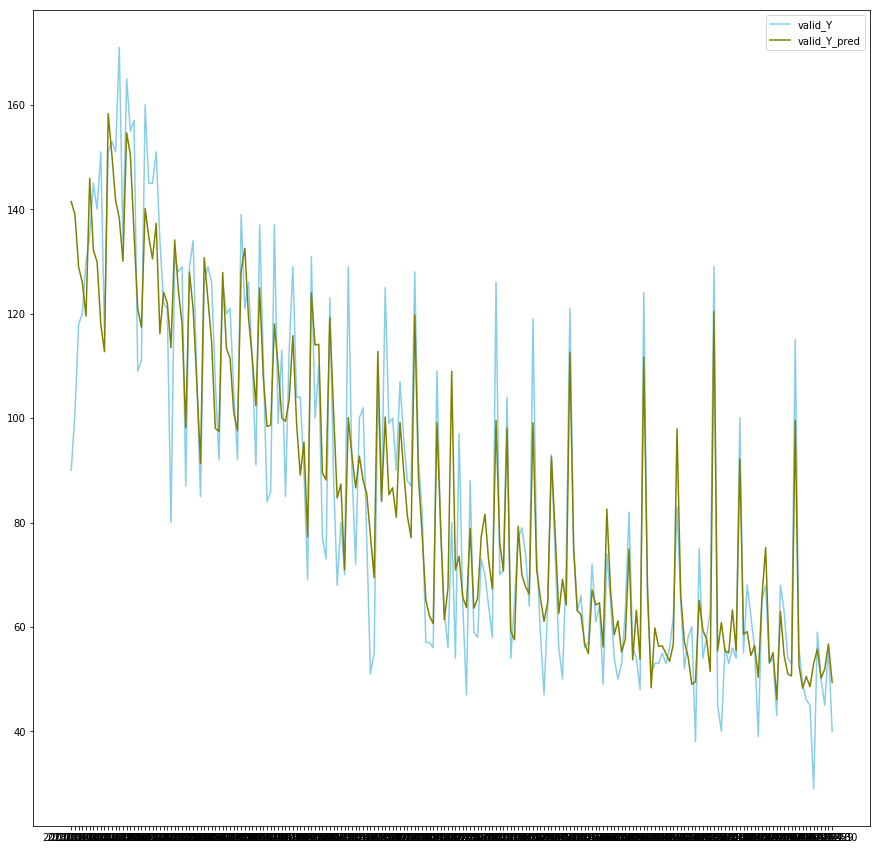

In [10]:
data = pd.DataFrame()
data['datetime'] = train_df['datetime']
data['valid_Y'] = train_df['y']
data['valid_Y_pred'] = pd.Series(valid_Y_pred[:,0], name = 'valid_Y_pred')

plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.plot( 'datetime', 'valid_Y'     , data=data, color='skyblue')
plt.plot( 'datetime', 'valid_Y_pred', data=data, color='olive')
plt.legend()

In [11]:
test_df = pd.read_csv("./C01_test_encoded.csv")
#test_df.info()

In [12]:
test_df.head(5)

,datetime,y,dateinterval,dayofmonth,weekofyear,dayofweek,soldout,kcal_fill_median,kcal_fill_mean,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,NaN,0.62,0.33,0.63,0.50,1.001,0.55,0.55,0.001,0.001,0.001,0.72,0.48,0.51
1,2014-10-2,NaN,0.62,0.34,0.63,0.57,0.001,0.53,0.53,0.001,0.001,0.001,0.54,0.48,0.56
2,2014-10-3,NaN,0.62,0.35,0.63,0.64,0.001,0.49,0.49,0.001,0.001,0.001,0.45,0.48,0.62
3,2014-10-6,NaN,0.62,0.38,0.64,0.35,1.001,0.47,0.47,0.001,0.001,0.001,0.72,0.56,0.53
4,2014-10-7,NaN,0.62,0.39,0.64,0.42,0.001,0.58,0.59,0.001,0.001,0.001,0.45,0.48,0.54


In [13]:
test_data = test_df.values
X_test = test_data[:, 2:]

In [14]:
Y_test = model.predict(X_test, verbose=1)
#y_test = model.predict_proba(xs_test, batch_size=1000, verbose=1)

40/40 [==============================] - 0s 55us/step


In [15]:
Y_test.shape

(40, 1)

In [16]:
Y_test[0:20,:]

array([[ 58.54946 ],
       [ 51.521996],
       [ 46.77372 ],
       [ 64.39526 ],
       [ 52.62352 ],
       [ 50.992775],
       [ 58.951775],
       [107.983376],
       [ 49.646805],
       [ 56.345573],
       [ 49.18814 ],
       [ 49.482132],
       [ 58.09552 ],
       [ 58.137352],
       [ 58.663673],
       [ 58.155342],
       [ 87.75403 ],
       [ 57.696144],
       [ 55.094772],
       [ 50.537727]], dtype=float32)

In [17]:
data2 = pd.DataFrame()
data2['datetime'] = test_df['datetime']
data2['valid_Y_pred'] = pd.Series(Y_test[:,0], name = 'valid_Y_pred')

data3 = pd.concat([data, data2], axis=0, sort=False)
data3[190:210]

,datetime,valid_Y,valid_Y_pred
190,2014-9-4,54.0,55.062477
191,2014-9-5,43.0,46.130257
192,2014-9-8,68.0,62.922371
193,2014-9-9,63.0,54.525749
194,2014-9-10,54.0,50.998260
195,2014-9-11,53.0,50.605499
196,2014-9-12,115.0,99.577156
197,2014-9-16,56.0,52.717003
198,2014-9-17,49.0,48.262451
199,2014-9-18,46.0,50.488579


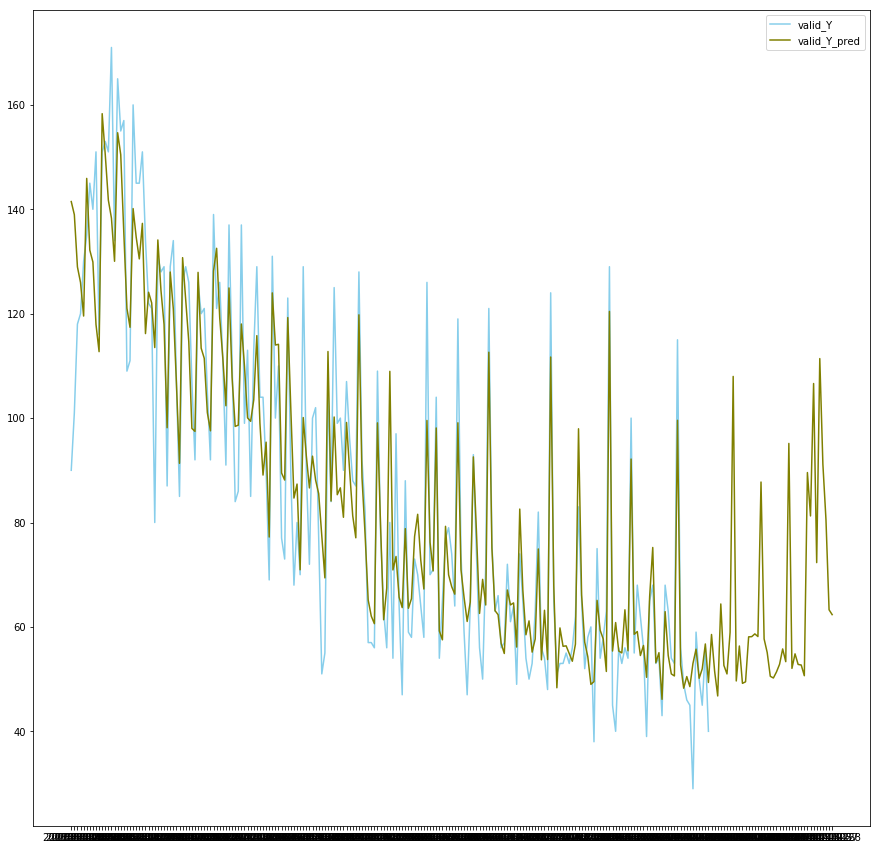

In [18]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.plot( 'datetime', 'valid_Y'     , data=data3, color='skyblue')
plt.plot( 'datetime', 'valid_Y_pred', data=data3, color='olive')
plt.legend()

In [19]:
Submission = pd.DataFrame()
Submission["datetime"] = test_df["datetime"]
Submission["y"] = Y_test.astype(int)

In [20]:
import csv
Submission.to_csv("D01_Submission_2.csv", index=False, header=False)